In [1]:
## train , val <- 동시에 전처리 후에 나누면 안됨
## 나눈 다음에 따로 전처리 해야함

In [1]:
from os.path import join
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

#### 조인 왜 쓰냐
train_path = join('서울IT직업전문학교_캐글_강의','input', 't_train.csv')
test_path  = join('서울IT직업전문학교_캐글_강의','input', 't_test.csv')

In [2]:
train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

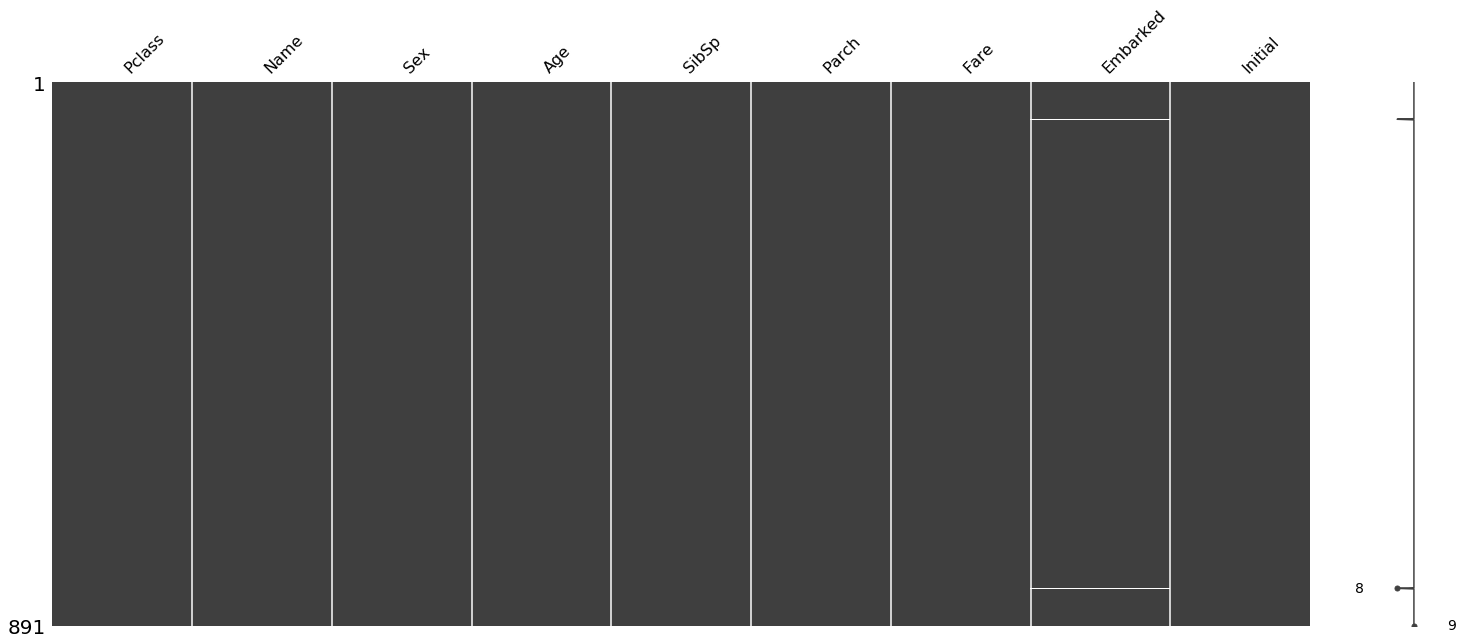

In [33]:
msno.matrix(train)

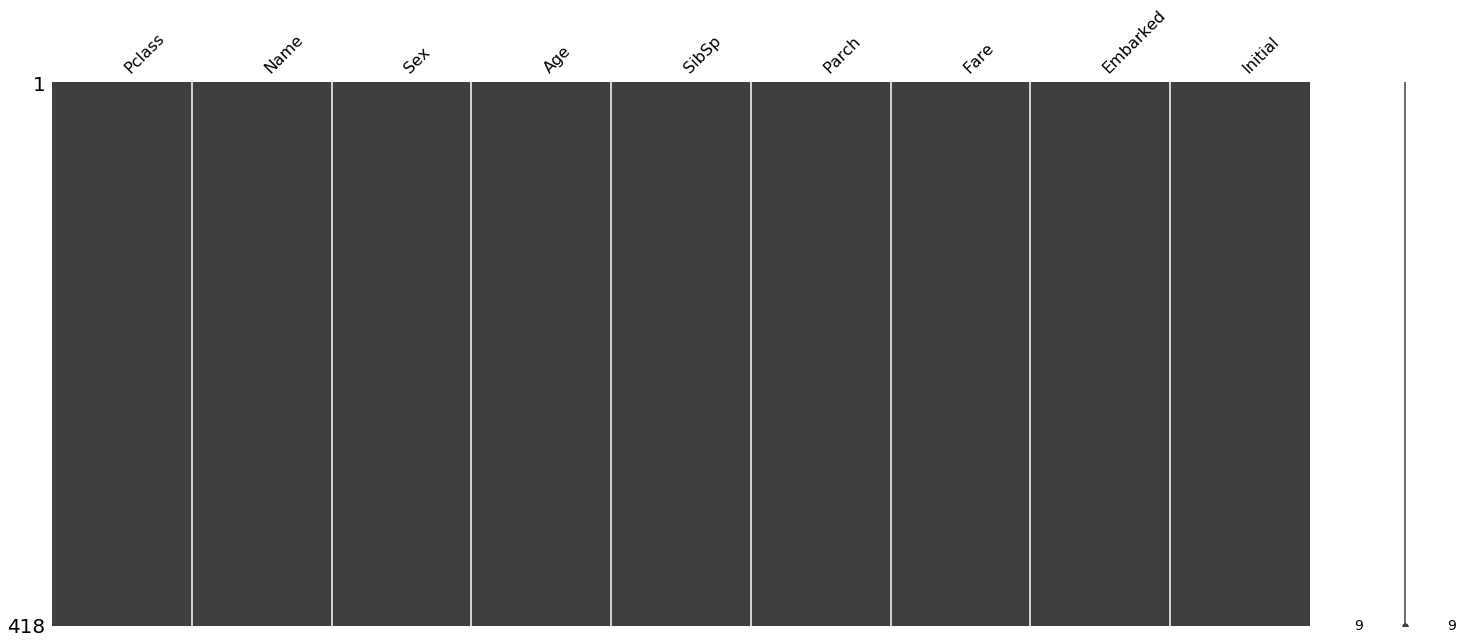

In [34]:
msno.matrix(test)

In [5]:
del_cols = ['PassengerId','Ticket','Cabin']

for c in del_cols:
    del train[c]
    del test[c]

In [6]:
train["Age"].isnull().sum()

177

In [7]:
train['Initial']= train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
test['Initial']= test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [8]:
pd.crosstab(train['Initial'], train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [9]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [10]:
train.groupby('Initial').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,
Master,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


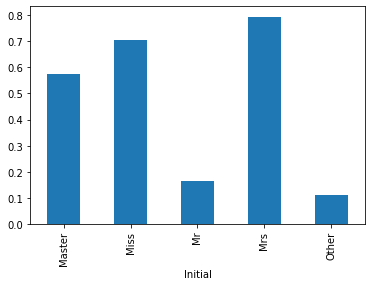

In [11]:
train.groupby('Initial')['Survived'].mean().plot.bar()

In [12]:
train.groupby('Initial').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,
Master,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


In [13]:
groupby_Age = train.groupby('Initial').mean()['Age']

In [14]:
groupby_Age

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [15]:
list(groupby_Age.index)

['Master', 'Miss', 'Mr', 'Mrs', 'Other']

In [21]:
for init in list(groupby_Age.index):
    train.loc[(train.Age.isnull())&(train.Initial==init),'Age'] = groupby_Age[init]
    test.loc[(test.Age.isnull())&(test.Initial==init),'Age'] = groupby_Age[init]


In [18]:
# train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age'] = 33
# train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age'] = 36
# train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age'] = 5
# train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age'] = 22
# train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age'] = 46

# test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age'] = 33
# test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age'] = 36
# test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age'] = 5
# test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age'] = 22
# test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age'] = 46


In [25]:
y_train = train['Survived']
del train['Survived']

In [26]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(train, y_train, test_size=0.3, random_state=2019)

In [32]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

x_tr['Embarked'] = x_tr['Embarked'].fillna(x_tr['Embarked'].mode()[0])
x_val['Embarked'] = x_val['Embarked'].fillna(x_val['Embarked'].mode()[0])

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
new_train = pd.get_dummies(x_tr)
new_test = pd.get_dummies(x_val)

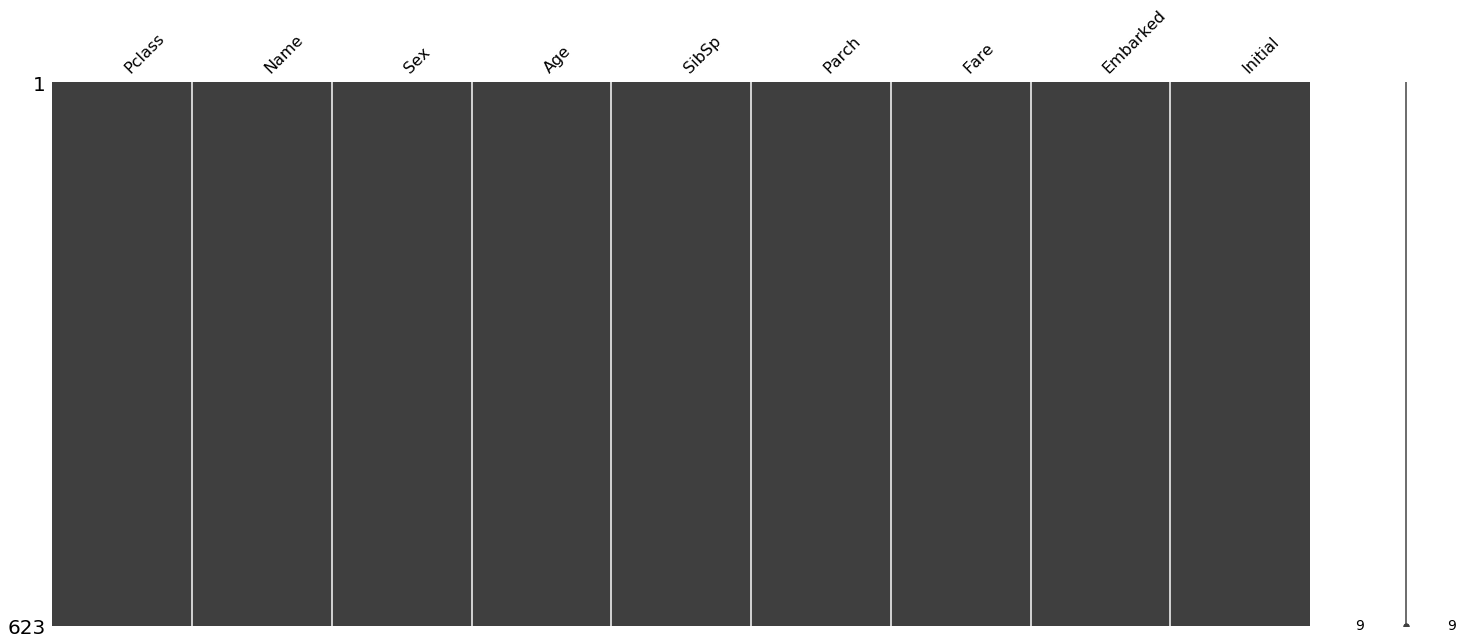

In [35]:
msno.matrix(x_tr)

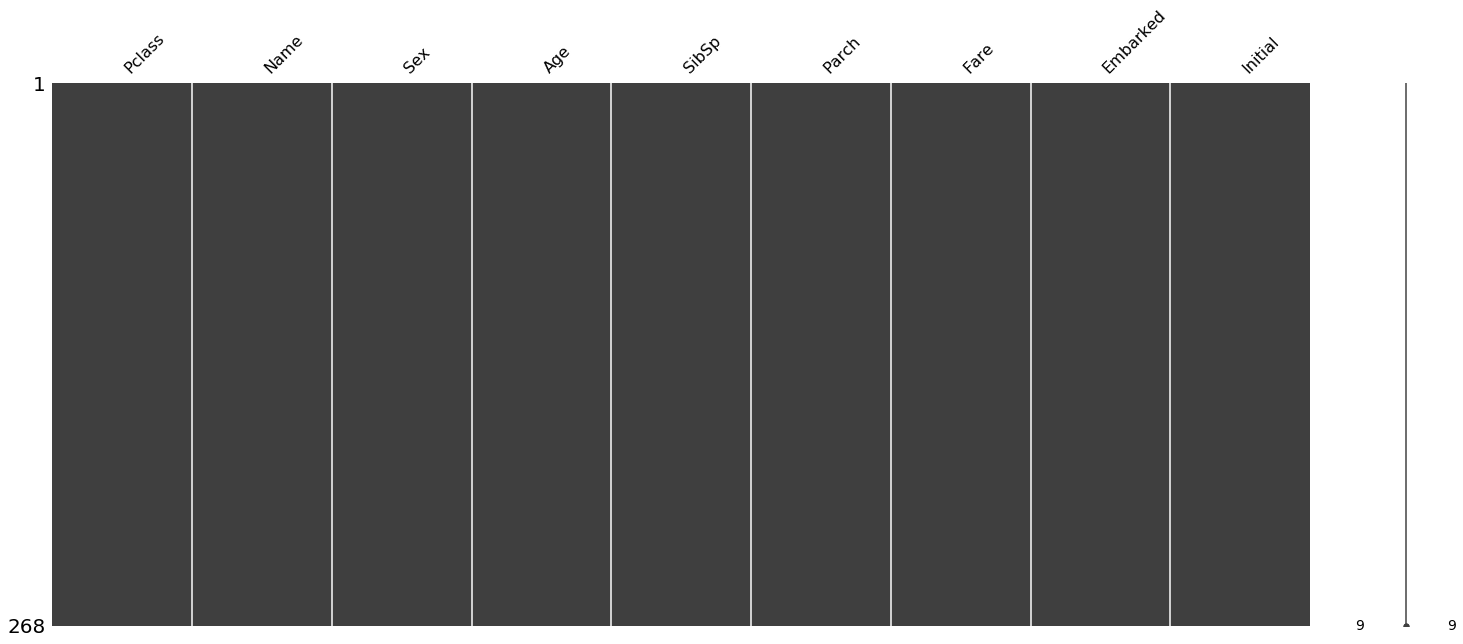

In [36]:
msno.matrix(x_val)

In [29]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=2019) 
kf.split()